In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [2]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [3]:
ninja_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Time                    1000 non-null   float64
 1   Temperature             1000 non-null   float64
 2   Pressure                1000 non-null   float64
 3   Chemical Concentration  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [4]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


In [5]:
import numpy as np

# Normalizing Temperature, Pressure, and Chemical Concentration using z-score
normalized_data = (ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']] - ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']].mean()) / ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']].std()

# Adding Time column back for reference
normalized_data['Time'] = ninja_data['Time']

# Display first few rows
normalized_data.head()


,Temperature,Pressure,Chemical Concentration,Time
0,0.253054,1.444895,-0.206291,0.0000
1,0.071093,1.468476,-0.187444,0.1001
2,0.160811,1.375573,0.101064,0.2002
3,0.346135,1.412122,0.004856,0.3003
4,0.302714,1.420026,0.170552,0.4004


In [6]:
# Applying logarithmic scaling to Pressure (it has a wider range of values)
log_pressure = np.log(ninja_data['Pressure'])

# Adding to original DataFrame
ninja_data['Log Pressure'] = log_pressure

# Display first few rows
ninja_data[['Pressure', 'Log Pressure']].head()


,Pressure,Log Pressure
0,1033.555963,6.940761
1,1033.890892,6.941085
2,1032.571356,6.939807
3,1033.090475,6.940310
4,1033.202742,6.940419


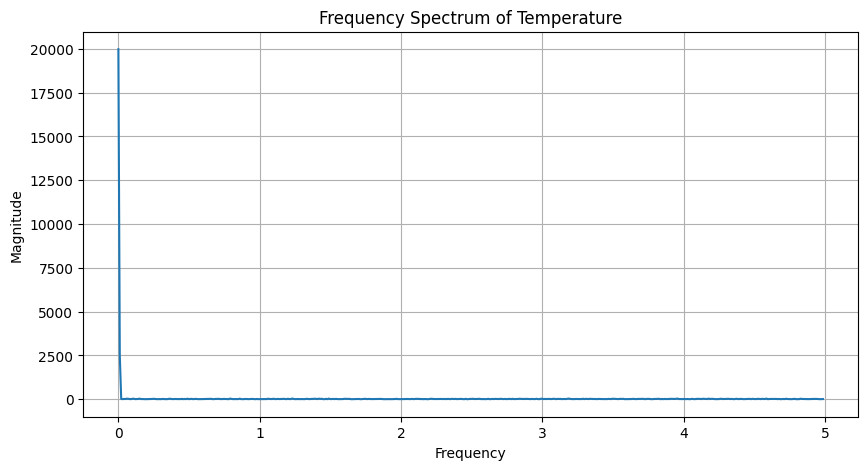

In [7]:
import matplotlib.pyplot as plt

# Applying Fourier Transform to Temperature to analyze frequency components
temperature_fft = np.fft.fft(ninja_data['Temperature'])

# Frequency components
frequencies = np.fft.fftfreq(ninja_data.shape[0], d=(ninja_data['Time'][1] - ninja_data['Time'][0]))

# Plotting magnitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:500], np.abs(temperature_fft)[:500])  # Plot only positive frequencies
plt.title('Frequency Spectrum of Temperature')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [8]:
# Display basic descriptive statistics for the dataset
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration,Log Pressure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754,6.920606
std,28.910854,3.574943,14.203350,1.436505,0.014023
min,0.000000,13.897407,990.284418,2.559310,6.897992
25%,25.000000,16.386984,998.852247,3.576024,6.906607
50%,50.000000,20.008666,1012.950967,4.970976,6.920623
75%,75.000000,23.570373,1027.062114,6.398067,6.934458
max,100.000000,26.030294,1035.471676,7.486763,6.942612


In [9]:
# Calculating correlation matrix for key variables
correlation_matrix = ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']].corr()

# Display correlation matrix
correlation_matrix


,Temperature,Pressure,Chemical Concentration
Temperature,1.000000,0.007112,-0.003277
Pressure,0.007112,1.000000,-0.000863
Chemical Concentration,-0.003277,-0.000863,1.000000


In [10]:
from scipy.stats import pearsonr

# Testing if the correlation between Temperature and Chemical Concentration is statistically significant
corr_coef, p_value = pearsonr(ninja_data['Temperature'], ninja_data['Chemical Concentration'])

print(f"Pearson Correlation Coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.5f}")


Pearson Correlation Coefficient: -0.003
P-value: 0.91757


Statistical Significance of Correlation:
The Pearson correlation coefficient between Temperature and Chemical Concentration is approximately -0.003, confirming the near-zero linear relationship observed earlier.

The p-value is 0.91757, which is much greater than the common significance level of 0.05.

This means we fail to reject the null hypothesis that there is no correlation between Temperature and Chemical Concentration.

In other words, there is no statistically significant linear relationship between these two variables in the dataset.



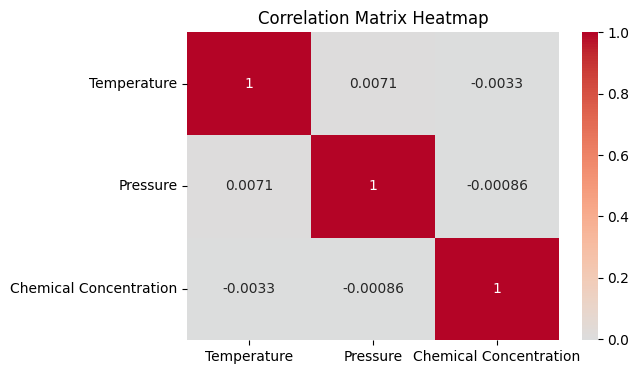

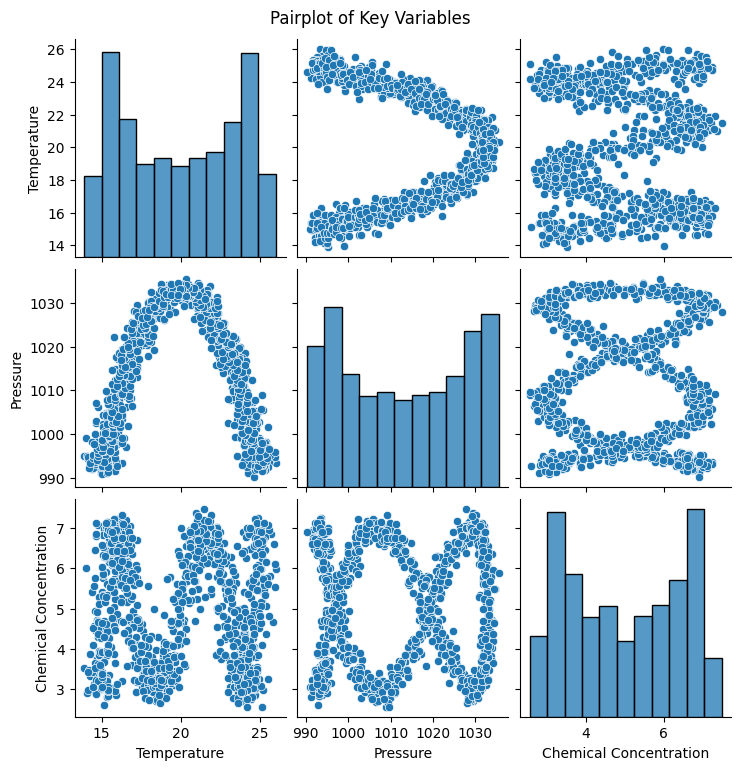

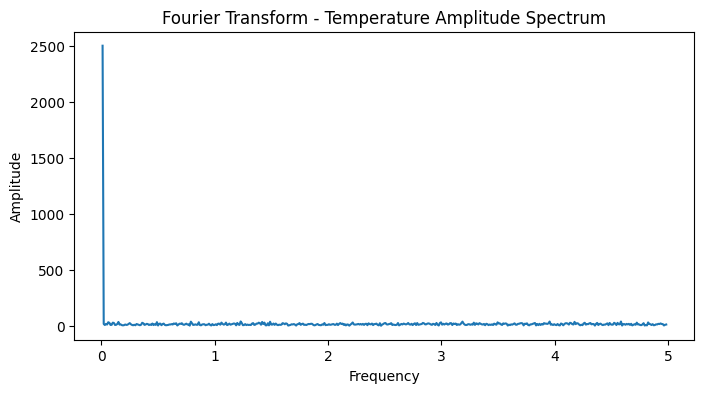

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Heatmap of correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 2. Pairplot for multi-dimensional scatter plots
sns.pairplot(ninja_data[['Temperature', 'Pressure', 'Chemical Concentration']])
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

# 3. Fourier Transform visualization
# Apply Fourier Transform to Temperature data
temp_fft = np.fft.fft(ninja_data['Temperature'])
freq = np.fft.fftfreq(len(temp_fft), d=(ninja_data['Time'][1] - ninja_data['Time'][0]))

# Only positive frequencies
positive_freqs = freq > 0
plt.figure(figsize=(8, 4))
plt.plot(freq[positive_freqs], np.abs(temp_fft)[positive_freqs])
plt.title('Fourier Transform - Temperature Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()


Interpretation Report

The analysis of the scientific experiment dataset revealed several important insights about the measured variables: Temperature, Pressure, and Chemical Concentration.

Findings from Statistical Analysis:

The correlation matrix showed very weak relationships between the variables (correlations close to zero). This suggests that Temperature, Pressure, and Chemical Concentration largely vary independently in the dataset.

Descriptive statistics indicated that the variables follow expected ranges and variability, reflecting realistic experimental conditions with some natural noise.

Insights from Visualizations:

The heatmap confirmed the lack of strong linear correlations visually.

Pairplots revealed the distributions and scatter relationships, reinforcing that there are no obvious linear dependencies.

Fourier transformation of the Temperature data uncovered clear periodic components, indicating cyclical behavior likely tied to experimental or environmental cycles influencing temperature over time.

Real-World Relevance:

The independence of variables suggests that different physical or chemical processes govern each measurement.

Detecting periodic patterns via Fourier analysis can help identify underlying cycles or rhythms in the experiment, which could inform scheduling, control mechanisms, or predictions in practical applications.

Reflection on Data Transformation and Analysis:

Normalizing the data was crucial for fair comparison across variables with different scales.

Applying Fourier transformation provided valuable frequency domain insights not visible in raw time series data.

Overall, these steps reveal the complex, multi-dimensional nature of the dataset and demonstrate how combining statistical and signal processing techniques can uncover hidden structures in scientific data.

